# Introduction
**Dimensionality reduction boils down to reducing the complexity of data by reducing the dimensionality in order to improve the machine learning/ data science pmodelling process.**
### PCA is one of the most used unsupervised algorithms and is one of the most popular dimensionality reduction alogrithms
### PCA Uses 
![](images/pca1.jpg)
### The goal of PCA
![](images/pca2.jpg)
**In nutshell it is used to identify and detect the correlation between variables.**  
**If there is a strong correlation , we can reduce the dimensionalty which is the what PCA is intended for.**  
**We find the directions of maximum varaince in high dimensional data and then we project it onto a smaller dimensional subspace , while retaining most of the information.**  
![](images/pca3.jpg)
### Breakdown of the PCA process
![](images/pca4.jpg)
### Visualization of the PCA algorithm
#### 2D
![](images/pca5.jpg)
#### 3D
![](images/pca6.jpg)
### Unlike Linear Regression, rather than attempting to predict the values, PCA  is..... 
### `Attempting to learn about the relationships between the X & Y values quantified by finding a list of principle axes.`
### Weaknesses of PCA
1. Highly affected by outliers.

# Objectives - Wine Recommender System
## 1. Using a wine merchant wine stock data, perform a sensible clustering action to identify groups of customers  (`customer segment`) with similar preferences of wine. 
## 2. Build a predictive model such that for each new brand of wine added to the stock list, the merchant can easily assign the new wine brand to one of the customer segments for recommendation purposes.

### Since the customer segments are already provided, the only remaining task is to build a classification model that can classify a new wine entry towards one of the customer segments. 

## Importing the libraries

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import sklearn
%matplotlib inline

## Importing the dataset

In [3]:
data = pd.read_csv('data/Wine.csv')
data.head()

,Alcohol,Malic_Acid,Ash,Ash_Alcanity,Magnesium,Total_Phenols,Flavanoids,Nonflavanoid_Phenols,Proanthocyanins,Color_Intensity,Hue,OD280,Proline,Customer_Segment
0,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065,1
1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050,1
2,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185,1
3,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480,1
4,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735,1


In [16]:
data.describe()

,Alcohol,Malic_Acid,Ash,Ash_Alcanity,Magnesium,Total_Phenols,Flavanoids,Nonflavanoid_Phenols,Proanthocyanins,Color_Intensity,Hue,OD280,Proline,Customer_Segment
count,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000
mean,13.000618,2.336348,2.366517,19.494944,99.741573,2.295112,2.029270,0.361854,1.590899,5.058090,0.957449,2.611685,746.893258,1.938202
std,0.811827,1.117146,0.274344,3.339564,14.282484,0.625851,0.998859,0.124453,0.572359,2.318286,0.228572,0.709990,314.907474,0.775035
min,11.030000,0.740000,1.360000,10.600000,70.000000,0.980000,0.340000,0.130000,0.410000,1.280000,0.480000,1.270000,278.000000,1.000000
25%,12.362500,1.602500,2.210000,17.200000,88.000000,1.742500,1.205000,0.270000,1.250000,3.220000,0.782500,1.937500,500.500000,1.000000
50%,13.050000,1.865000,2.360000,19.500000,98.000000,2.355000,2.135000,0.340000,1.555000,4.690000,0.965000,2.780000,673.500000,2.000000
75%,13.677500,3.082500,2.557500,21.500000,107.000000,2.800000,2.875000,0.437500,1.950000,6.200000,1.120000,3.170000,985.000000,3.000000
max,14.830000,5.800000,3.230000,30.000000,162.000000,3.880000,5.080000,0.660000,3.580000,13.000000,1.710000,4.000000,1680.000000,3.000000


**The variance in ranges of the feature values suggests we might need to perform standardization on the winr feature values.**

In [4]:
# Extracting feature variables and truth labels
X = data.iloc[:, :-1].values
y = data.iloc[:, -1].values

## Creating Training and Test Data Sets

In [11]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

In [12]:
X_train[:2]

array([[1.369e+01, 3.260e+00, 2.540e+00, 2.000e+01, 1.070e+02, 1.830e+00,
        5.600e-01, 5.000e-01, 8.000e-01, 5.880e+00, 9.600e-01, 1.820e+00,
        6.800e+02],
       [1.269e+01, 1.530e+00, 2.260e+00, 2.070e+01, 8.000e+01, 1.380e+00,
        1.460e+00, 5.800e-01, 1.620e+00, 3.050e+00, 9.600e-01, 2.060e+00,
        4.950e+02]])

In [13]:
y_train[:2]

array([3, 2])

## Feature Scaling
### Standardizing the wine feature variables

In [14]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [15]:
X_train[:2]

array([[ 0.87668336,  0.79842885,  0.64412971,  0.12974277,  0.48853231,
        -0.70326216, -1.42846826,  1.0724566 , -1.36820277,  0.35193216,
         0.0290166 , -1.06412236, -0.2059076 ],
       [-0.36659076, -0.7581304 , -0.39779858,  0.33380024, -1.41302392,
        -1.44153145, -0.5029981 ,  1.70109989,  0.02366802, -0.84114577,
         0.0290166 , -0.73083231, -0.81704676]])

## Applying the PCA Algorithm
### Reducing the feature set dimesnisionality by extracting useful features from the currently available features

In [17]:
from sklearn.decomposition import PCA
pca = PCA(n_components = 2)

## Performing PCA on the training and test sets
X_train = pca.fit_transform(X_train)
X_test = pca.transform(X_test)

In [18]:
X_train[:2]

array([[-2.17884511, -1.07218467],
       [-1.80819239,  1.57822344]])

## Modelling
Here I train and test several classification models for comparison purposes  
1. Logistic Regressor
2. Random Forest Classifier
3. Gradient Boosted Classifier
4. Linear SVC

In [41]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.svm import SVC

logreg = LogisticRegression(random_state = 0).fit(X_train, y_train)
rfc = RandomForestClassifier(random_state = 42).fit(X_train, y_train)
gbc = GradientBoostingClassifier(random_state = 36).fit(X_train, y_train)
svc = SVC(kernel = 'linear', random_state = 10).fit(X_train, y_train)

## Evaluating the models

In [42]:
from sklearn.metrics import plot_confusion_matrix
import seaborn as sns

def evaluate(model):
    print('Model Accuracy', model.score(X_test, y_test))
    plot_confusion_matrix(model, X_test, y_test, colorbar = False, cmap = 'winter')
    return model.score(X_test, y_test)

### Logistic Regression Results

Model Accuracy 0.9722222222222222


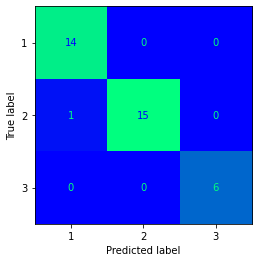

In [43]:
lr_score = evaluate(logreg)

### Linear SVC Results

Model Accuracy 0.9722222222222222


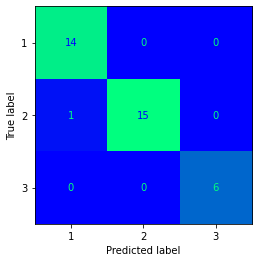

In [44]:
svc_score = evaluate(svc)

### Random Forest Classifier Results

Model Accuracy 0.9722222222222222


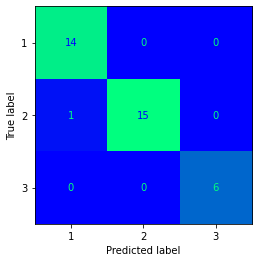

In [45]:
rfc_score = evaluate(rfc)

### Gradient Boosted Classifier Results

Model Accuracy 0.9722222222222222


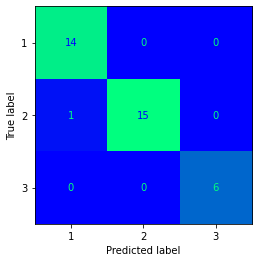

In [46]:
gbc_score = evaluate(gbc)

### Comparing Model Performance

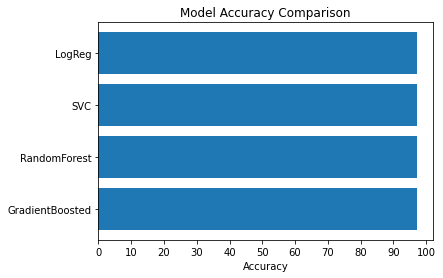

In [59]:
models = ('LogReg', 'SVC', 'RandomForest', 'GradientBoosted')
y_plot = np.arange(len(models))
x_plot = np.arange(0, 110, 10)
model_scores = [lr_score, svc_score, rfc_score, gbc_score]
model_scores = [value*100 for value in model_scores]
fig, ax = plt.subplots()
ax.barh(y_plot, model_scores)
ax.set_title('Model Accuracy Comparison')
ax.set_yticks(y_plot)
ax.set_xticks(x_plot)
ax.set_yticklabels(models)
ax.invert_yaxis()
ax.set_xlabel('Accuracy')
plt.show();

## Visualising the Test set results on the Logistic Regressor

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.


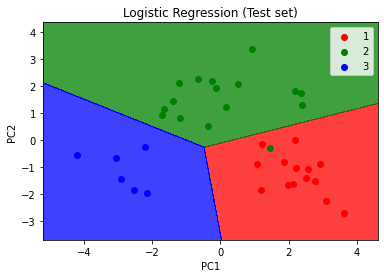

In [60]:
from matplotlib.colors import ListedColormap
X_set, y_set = X_test, y_test
X1, X2 = np.meshgrid(np.arange(start = X_set[:, 0].min() - 1, stop = X_set[:, 0].max() + 1, step = 0.01),
                     np.arange(start = X_set[:, 1].min() - 1, stop = X_set[:, 1].max() + 1, step = 0.01))
plt.contourf(X1, X2, logreg.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape),
             alpha = 0.75, cmap = ListedColormap(('red', 'green', 'blue')))
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())
for i, j in enumerate(np.unique(y_set)):
    plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1],
                c = ListedColormap(('red', 'green', 'blue'))(i), label = j)
plt.title('Logistic Regression (Test set)')
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.legend()
plt.show()